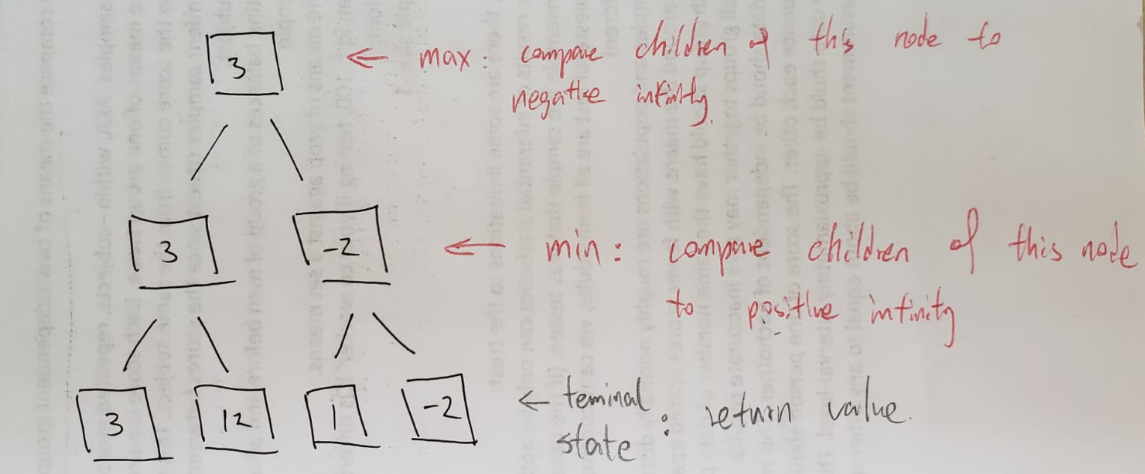

In [1]:
from IPython.display import Image
Image(filename='minimax/minimax1.png')

In [ ]:
def value(state):
    if the state is a terminal state: return the state's utility
    if the next agent is MAX: return max_value(state)
    if the next agent is MIN: return min_value(state)

In [ ]:
def min_value(state):
    initialize v = infinity            # start estimate the value of current node is positive infinity
    for each successor of state:       # inspect the children of the current node if they are lower
        v = min(v, max_value(successor))    # we pick the lower value
    return v

In [ ]:
def max_value(state):
    initialize v = -infinity           # start estimate the value of current node is negative infinity
    for each successor of state:       # inspect the children of the current node if they are higher
        v = max(v, min_value(successor))    # we pick the higher value
    return v

### Pruning minimax: Alpha-Beta implementation
**alpha**: MAX's best option on path to root <br/>
**beta**: MIN's best option on path to root

In [ ]:
def max_value(state, alpha, beta):
    initialize v = -infinity           # start estimate the value of current node is negative infinity
    for each successor of state:       # loop through children 
        v = max(v, value(successor, alpha, beta))    # inspect value of children nodes relative to our best root option 
        if v >= beta return v          # is the value greater than beta, if so select the value to pass on and forget the rest
        alpha = max(alpha, v)          # log down alpha of current node
    return v

In [ ]:
def min_value(state, alpha, beta):
    initialize v = infinity            # start estimate the value of current node is infinity
    for each successor of state:       # loop through children 
        v = min(v, value(successor, alpha, beta))    # inspect value of children nodes relative to our best root option  
        if v =< alpha return v         # is the value less than alpha, if so select the value to pass on and forget the rest
        beta = min(beta, v)            # log down beta of current node
    return v

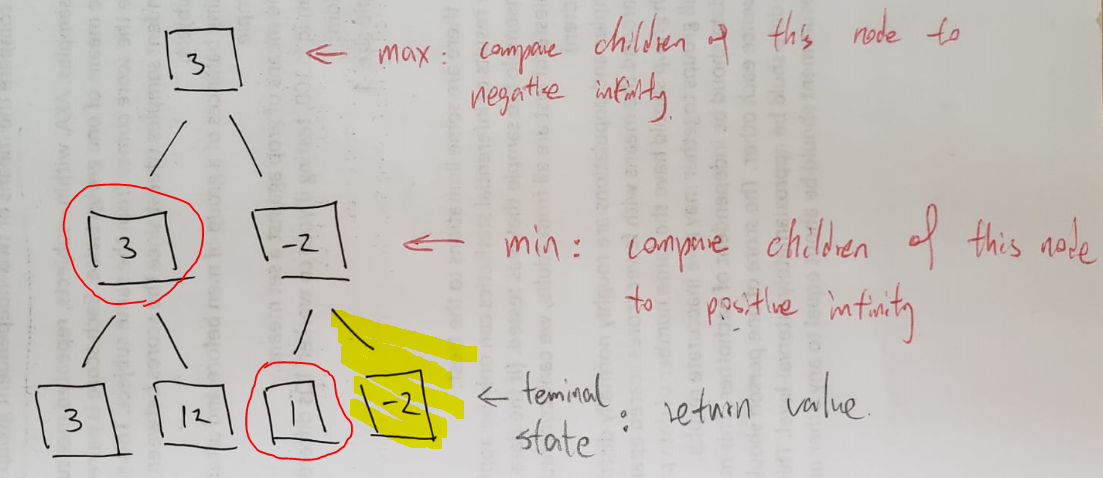

In [2]:
Image(filename='minimax/minimax2.png')

When alpha is 3, we compare the value of the children for the other branch, value 1 is detected, and it's less or equal to alpha, 1 gets passed without evaluating the -2 node. Regardless of what the highlighted node yields, min player will pick a value that is less or equal to 1, and the max player will pick 3. this is the idea of pruning, saving computation by not evaluating value in all nodes.